In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Перевірка зчитування файлу
df = pd.read_csv("shopping_trends.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [6]:
# Перевірка кількості рядків та стовпців
df.shape

(3900, 19)

In [7]:
# Перевірка кількості стовпців у наборі даних
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [8]:
# Перевірка наявності в наборі даних нульових значень
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [9]:
# Перевірка наявності в наборі даних повторюваних значень
df.duplicated().sum()

0

In [36]:
# Перейменування стовпців
df.columns = ['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases']
df

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


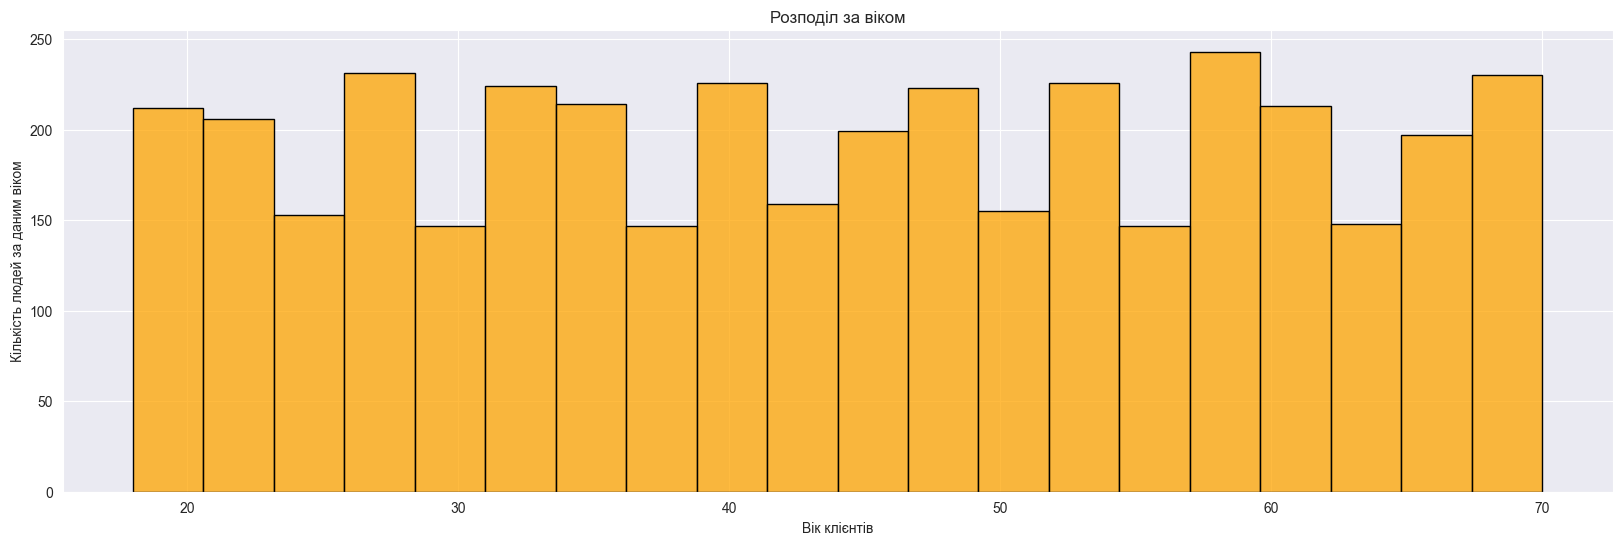

In [25]:
# Побудова гістрограми 
plt.figure(figsize=(20, 6))
sns.histplot(df['age'], bins=20, kde=False, color='orange', edgecolor='k')
plt.title('Розподіл за віком')
plt.xlabel('Вік клієнтів')
plt.ylabel('Кількість людей за даним віком')
plt.show()

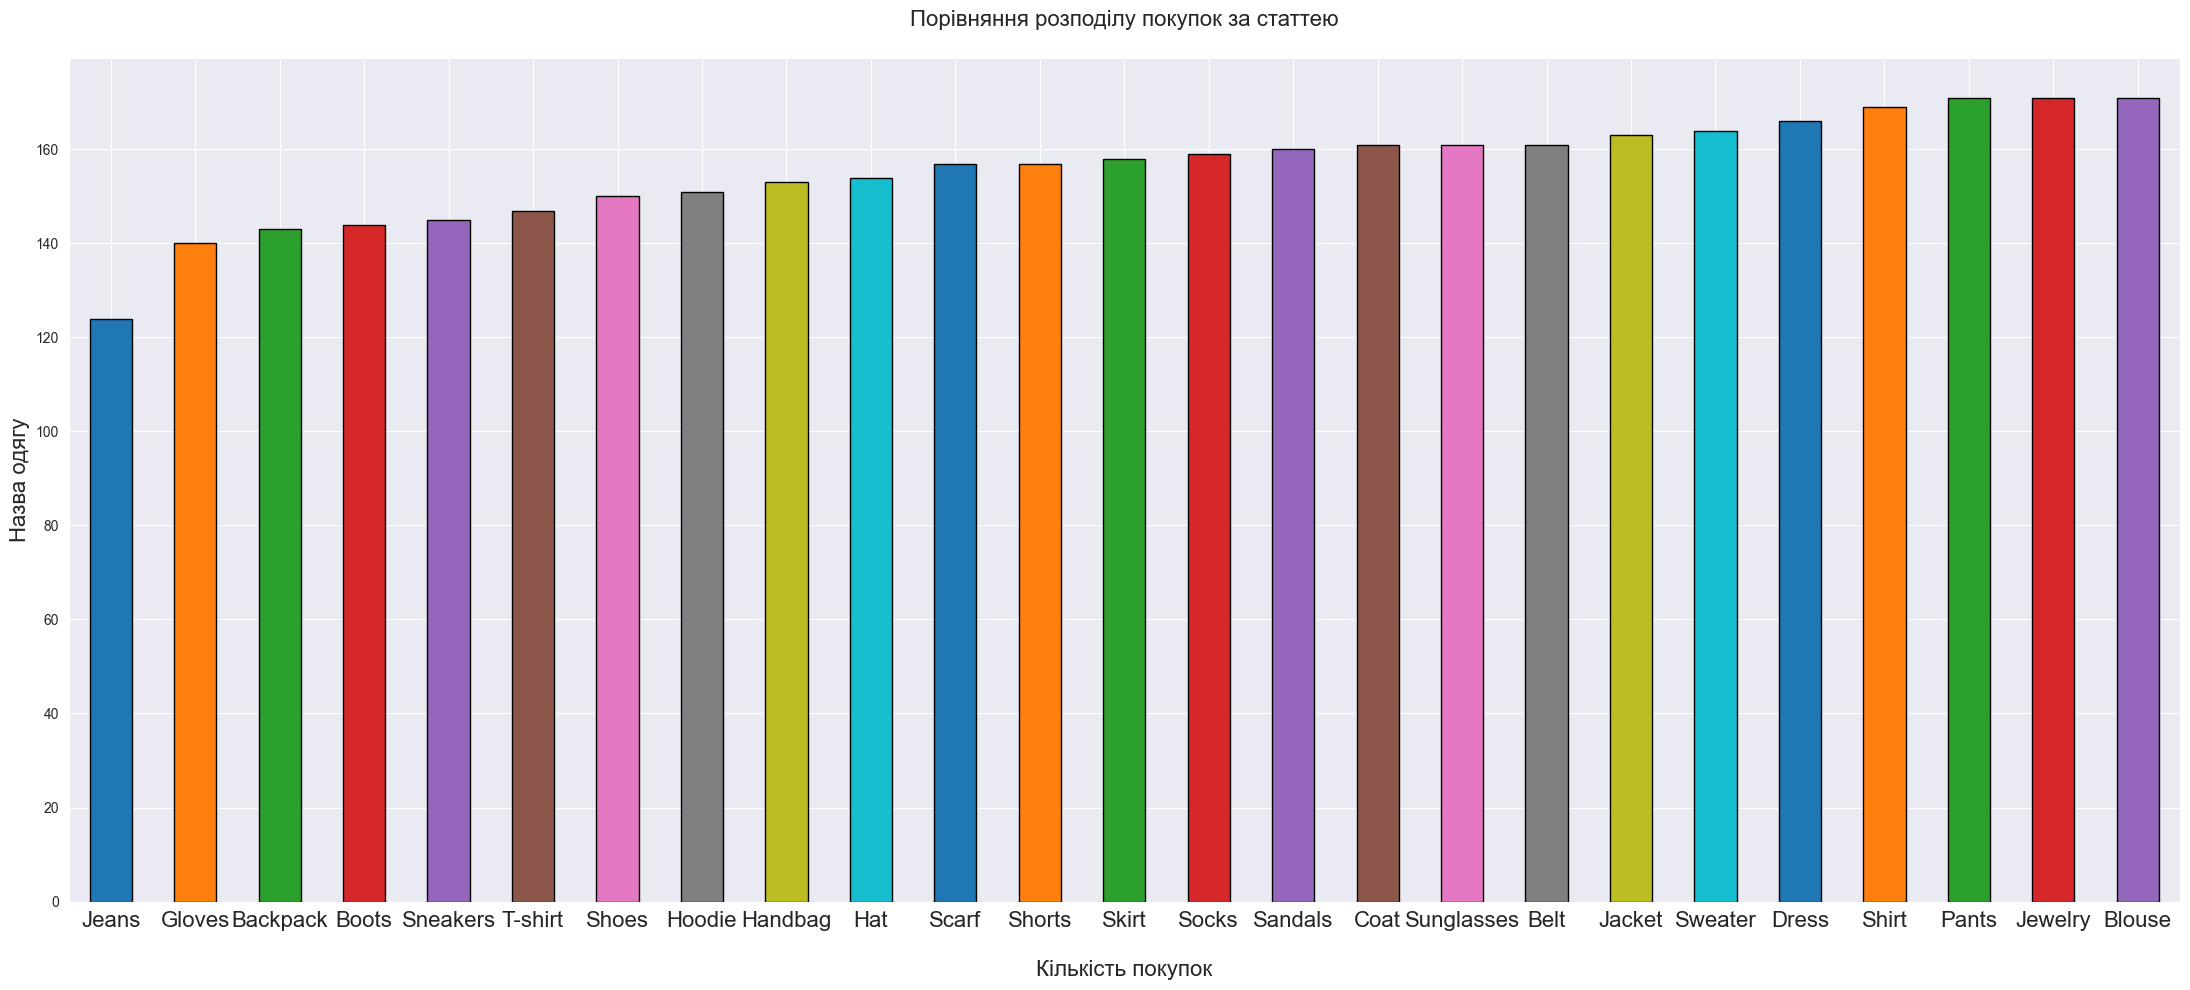

In [21]:
# Побудова стопчастої діаграми 
plt.figure(figsize = (22, 10))
df["item_purchased"].value_counts().sort_values(ascending = True).plot(kind = 'bar', color = sns.color_palette('tab10'), edgecolor = 'black')
plt.ylabel('Назва одягу', fontsize = 16)
plt.xlabel('\nКількість покупок', fontsize = 16)
plt.title('Порівняння розподілу покупок за статтею\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

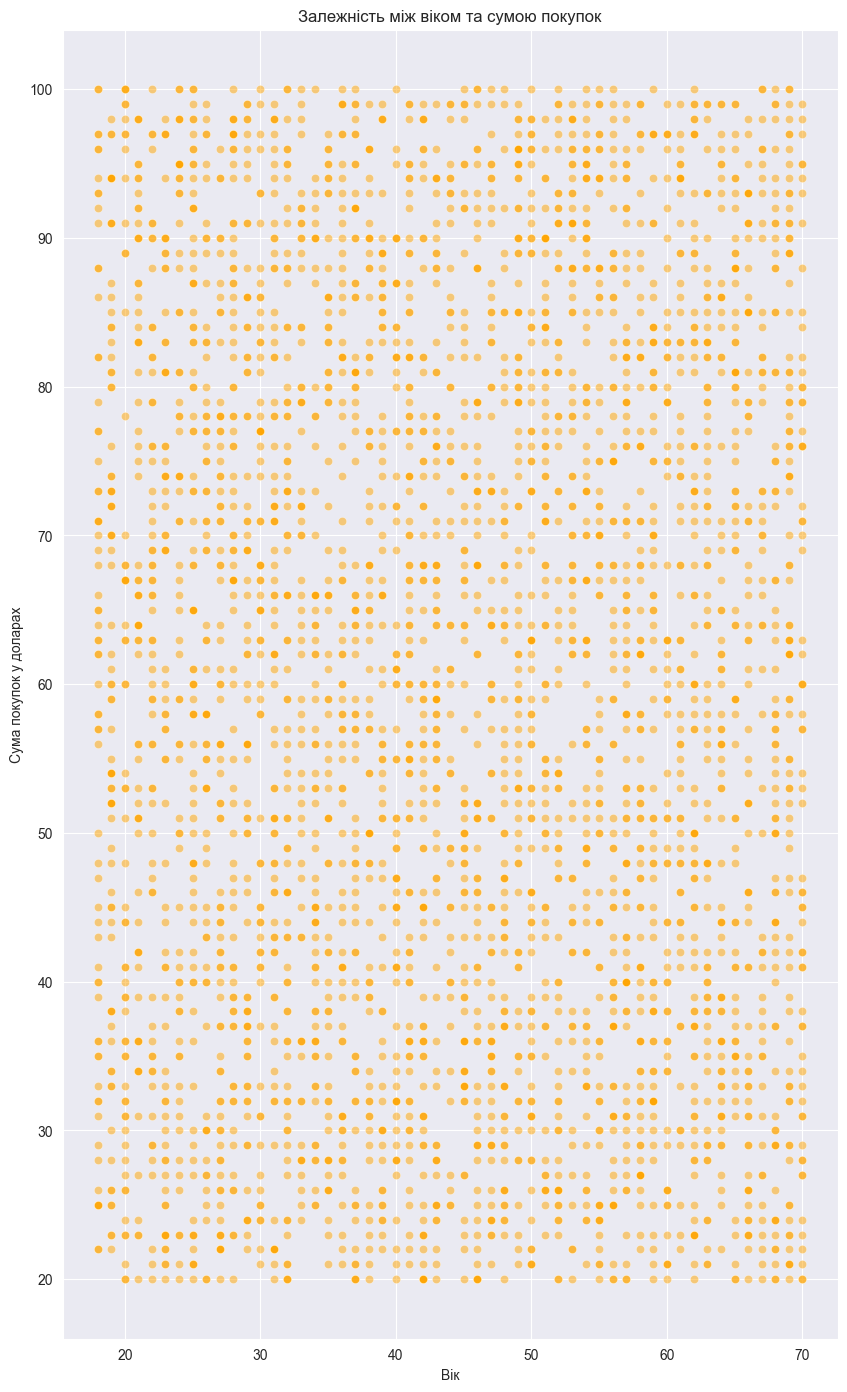

In [35]:
plt.figure(figsize=(10, 17))
sns.scatterplot(x=df['age'], y=df['purchase_amount_(usd)'], color='orange', alpha=0.5)
plt.title("Залежність між віком та сумою покупок")
plt.xlabel("Вік")
plt.ylabel("Сума покупок у доларах")
plt.show()

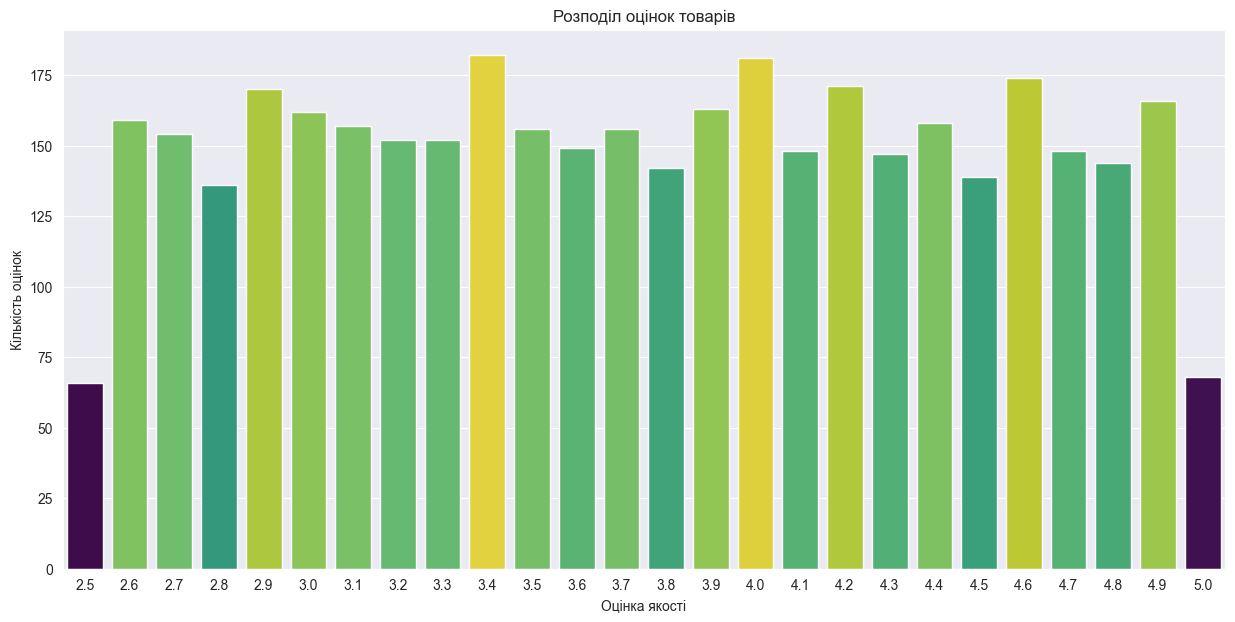

In [59]:
plt.figure(figsize=(15, 7))
# Підрахунок кількості користувачів для кожної оцінки
rating_counts = df['review_rating'].value_counts().reset_index()
rating_counts.columns = ['review_rating', 'count']

sns.barplot(x=rating_counts['review_rating'], y=rating_counts['count'], palette='viridis', hue= rating_counts['count'], legend=False)
plt.title("Розподіл оцінок товарів")
plt.xlabel("Оцінка якості")
plt.ylabel("Кількість оцінок")
plt.show()


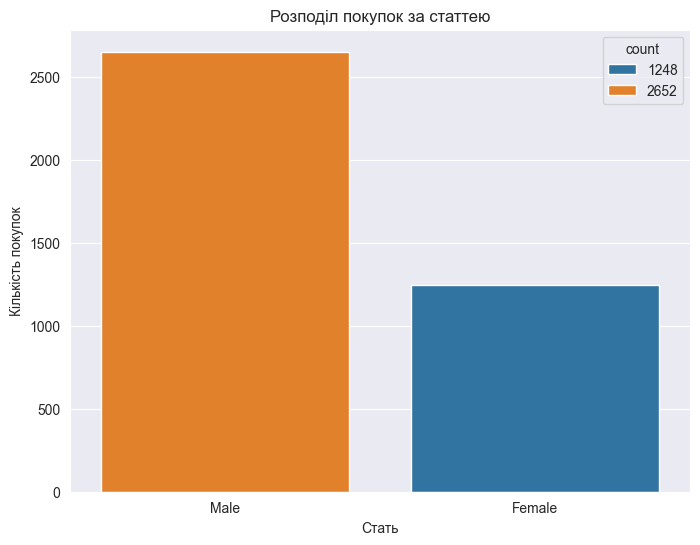

In [82]:
plt.figure(figsize=(8, 6))
# Підрахунок кількості користувачів для кожної оцінки
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
sns.barplot(x=gender_counts['gender'], y=gender_counts['count'], hue=gender_counts['count'], palette='tab10')
plt.title("Розподіл покупок за статтею")
plt.xlabel("Стать")
plt.ylabel("Кількість покупок")
plt.show()

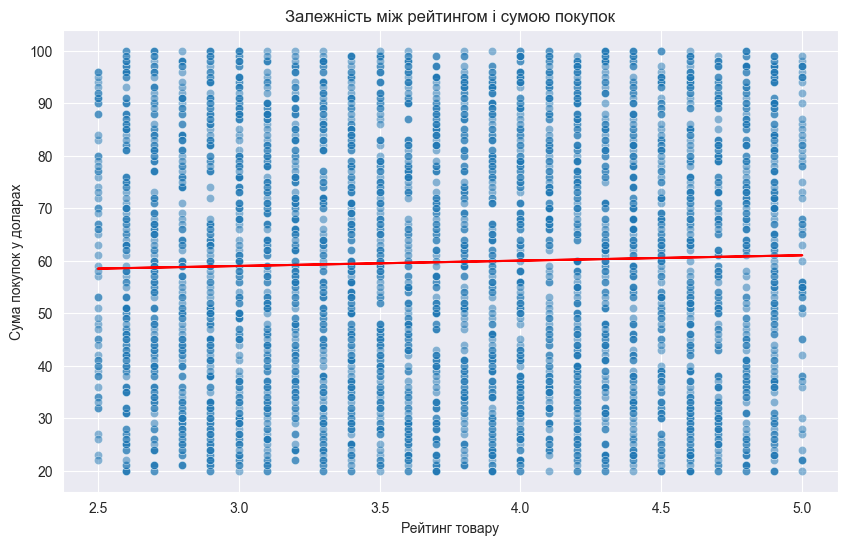

array([1.01775564])

In [114]:
# Створюємо модель регресії, щоб зрозуміти чи існує зв'язок між review_rating та purchase_amount_(usd)
X = df['review_rating'].values.reshape(-1, 1)  # Оцінка якості (рейтинг) товару
y = df['purchase_amount_(usd)'].values 
regressor = LinearRegression()
regressor.fit(X, y)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['review_rating'], y=df['purchase_amount_(usd)'], alpha=0.5, palette='inferno')
plt.plot(X, regressor.predict(X), color='red')
plt.title("Залежність між рейтингом і сумою покупок")
plt.xlabel("Рейтинг товару")
plt.ylabel("Сума покупок у доларах")

plt.show()
# Коефіцієнт навченої моделі (a)
a = regressor.coef_
a
# Як стає зрозуміло з аналізів лінійної регресії, що між рейтингом і сумою покупок є зв'язок. Так як чим більше рейтинг тим більше буде сума покупок так як показує коефіцієнт, що очікується збільшення покупок на 1 одиницю при збільшенні рейтингу товару на одиницю

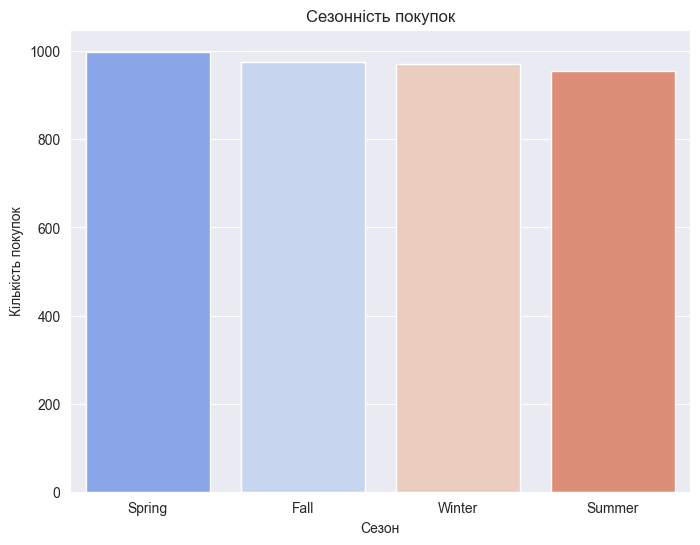

In [113]:
season_counts = df['season'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='coolwarm')
plt.title("Сезонність покупок")
plt.xlabel("Сезон")
plt.ylabel("Кількість покупок")
plt.show()

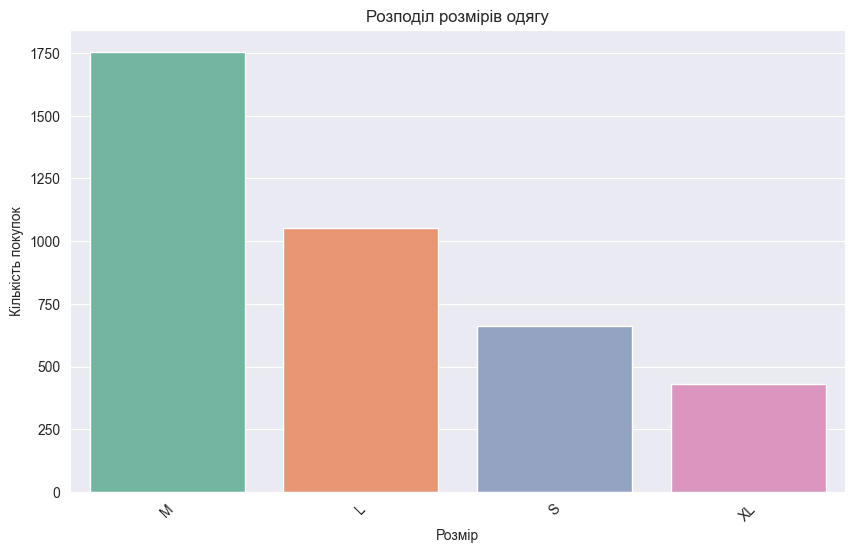

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='size', palette='Set2', order=df['size'].value_counts().index)
plt.title("Розподіл розмірів одягу")
plt.xlabel("Розмір")
plt.ylabel("Кількість покупок")
plt.xticks(rotation=45)  # Поворот підписів розмірів для кращої видимості
plt.show()

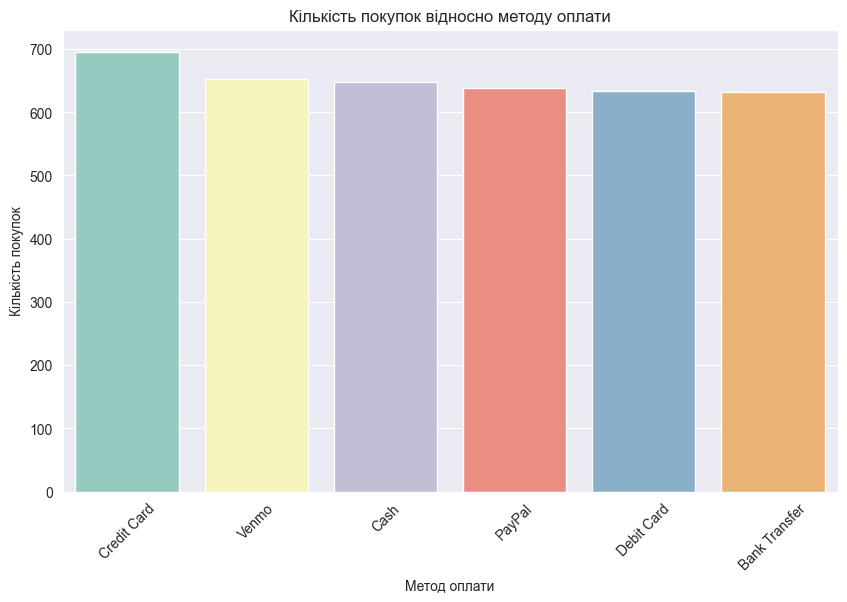

In [116]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='payment_method', palette='Set3', order=df['payment_method'].value_counts().index)
plt.title("Кількість покупок відносно методу оплати")
plt.xlabel("Метод оплати")
plt.ylabel("Кількість покупок")
plt.xticks(rotation=45)  # Поворот підписів методів оплати для кращої видимості
plt.show()

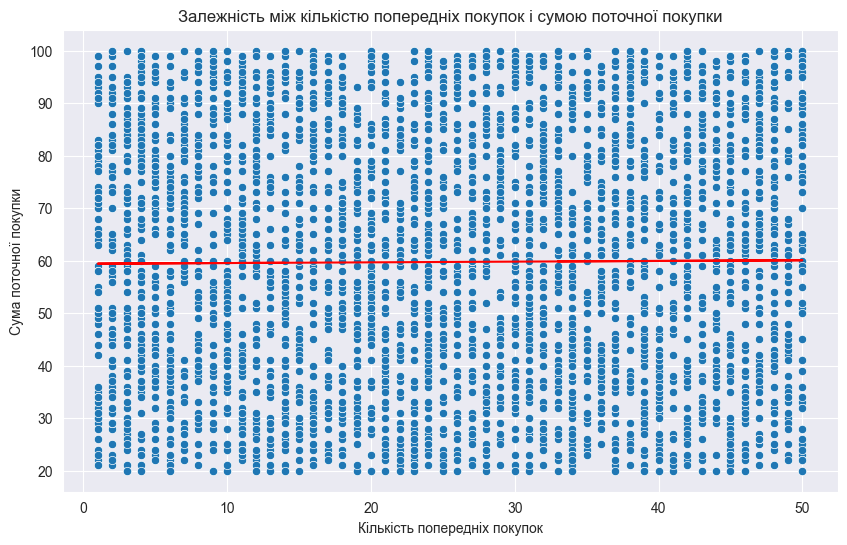

array([0.01321959])

In [120]:
X = df['previous_purchases'].values.reshape(-1, 1)
y = df['purchase_amount_(usd)'].values 
regressor = LinearRegression()
regressor.fit(X, y)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='previous_purchases', y='purchase_amount_(usd)', data=df)
plt.plot(X, regressor.predict(X), color='red')
plt.title("Залежність між кількістю попередніх покупок і сумою поточної покупки")
plt.xlabel("Кількість попередніх покупок")
plt.ylabel("Сума поточної покупки")
plt.show()

# Коефіцієнт навченої моделі (a)
a = regressor.coef_
a
# Як стає зрозуміло з аналізу лінійної регресії, що коефіцієнт дорівнює а = 0, а це каже, що зв'язку між кількістю попередніх покупок (previous_purchases) і сумою поточної покупки (purchase_amount) немає

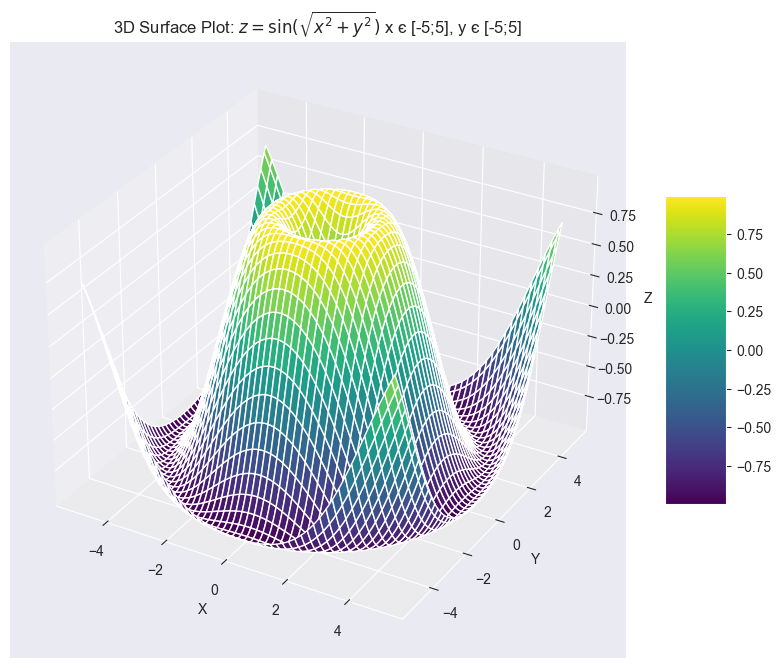

In [128]:
# Створення даних
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

# Побудова 3D surface plot
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)  # Додавання кольорової легенди

# Налаштування відображення графіку
ax.set_title("3D Surface Plot: $z = \\sin(\\sqrt{x^2 + y^2})$ x є [-5;5], y є [-5;5]")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

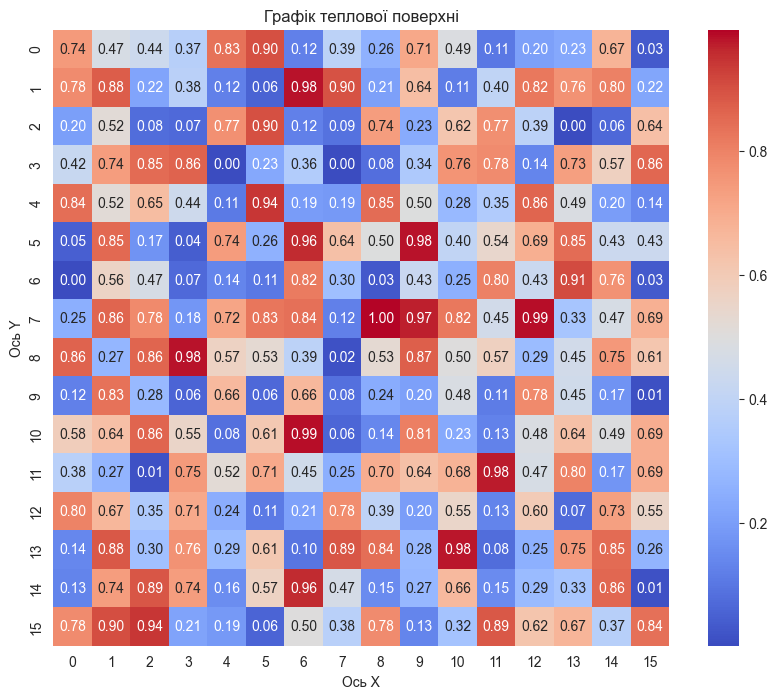

In [130]:
# Згенеруємо випадкову матрицю даних
data_matrix = np.random.rand(16, 16)

# Побудова теплової поверхні
plt.figure(figsize=(10, 8))
sns.heatmap(data_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Налаштування відображення графіку
plt.title("Графік теплової поверхні")
plt.xlabel("Ось X")
plt.ylabel("Ось Y")

plt.show()